# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count


603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
#We want to obtain the following information from the weather API
    #Temperature (F) vs. Latitude
    #Humidity (%) vs. Latitude
    #Cloudiness (%) vs. Latitude
    #Wind Speed (mph) vs. Latitudlen(cities)

#create framework of dataframe
cities_df = pd.DataFrame({"City": cities})
cities_df["Country"] = ""
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["Max Temperature(F)"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed(mph)"] = ""
cities_df["Date"] = ""

#URL set-up
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units="Imperial"

target_url = weather_url + "units" + units + "&APPID=" + weather_api_key + "&q="

print("Beginning Data Retrieval")   
print("-----------------------------")

#iterate through each city to obtain humidity, cloudiness, etc
for index, row in cities_df.iterrows():
    city = row["City"]
    response = requests.get(target_url + city).json()
    
    #we will want to skip over any cities with incomplete information
    try:
        print(f"Processing Record {index + 1} of {len(cities)} | {city}")
        print(target_url + city)
        
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Latitude"] = response["coord"]["lat"]
        cities_df.loc[index, "Longitude"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temperature(F)"] = response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed(mph)"] = response["wind"]["speed"]
        cities_df.loc[index, "Date"] = response["dt"]
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 603 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?unitsImperial&APPID=6a5a617ded8b7f1694d15943948a993a&q=cabo san lucas
Processing Record 2 of 603 | jamestown
http://api.openweathermap.org/data/2.5/weather?unitsImperial&APPID=6a5a617ded8b7f1694d15943948a993a&q=jamestown
Processing Record 3 of 603 | shangzhi
http://api.openweathermap.org/data/2.5/weather?unitsImperial&APPID=6a5a617ded8b7f1694d15943948a993a&q=shangzhi
Processing Record 4 of 603 | lushunkou
http://api.openweathermap.org/data/2.5/weather?unitsImperial&APPID=6a5a617ded8b7f1694d15943948a993a&q=lushunkou
City not found. Skipping...
Processing Record 5 of 603 | almaznyy
http://api.openweathermap.org/data/2.5/weather?unitsImperial&APPID=6a5a617ded8b7f1694d15943948a993a&q=almaznyy
Processing Record 6 of 603 | atuona
http://api.openweathermap.org/data/2.5/weather?unitsImperial&APPID=6a5a617ded8b7f1694d15943948a993a&q=atuona
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
cities_df.count()

City                  603
Country               603
Latitude              603
Longitude             603
Max Temperature(F)    603
Humidity              603
Cloudiness            603
Wind Speed(mph)       603
Date                  603
dtype: int64

In [19]:
cities_df

,City,Country,Latitude,Longitude,Max Temperature(F),Humidity,Cloudiness,Wind Speed(mph),Date
0,cabo san lucas,MX,22.89,-109.91,293.15,42,40,5.1,1578320778
1,jamestown,AU,-33.21,138.6,292.23,60,0,2.03,1578320813
2,shangzhi,CN,45.21,127.96,262.68,90,100,1.73,1578320662
3,lushunkou,,,,,,,,
4,almaznyy,RU,48.03,40.04,276.15,93,75,4,1578320884
...,...,...,...,...,...,...,...,...,...
598,tirlyanskiy,RU,54.22,58.58,264.5,96,100,0.84,1578320949
599,chernyshevskiy,RU,63.01,112.47,263.82,93,100,5.63,1578320949
600,koslan,RU,63.46,48.9,258.68,94,82,3.28,1578320949
601,acapulco,MX,16.86,-99.88,298.15,83,5,0.08,1578320913


In [45]:
cities_df.to_csv("output_data/cities_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [23]:
print(cities_df.dtypes)

City                  object
Country               object
Latitude              object
Longitude             object
Max Temperature(F)    object
Humidity              object
Cloudiness            object
Wind Speed(mph)       object
Date                  object
dtype: object


In [33]:
#https://datatofish.com/convert-string-to-float-dataframe/

cities_df['Latitude'] = pd.to_numeric(cities_df['Latitude'], errors='coerce')
cities_df['Longitude'] = pd.to_numeric(cities_df['Longitude'], errors='coerce')
cities_df['Max Temperature(F)'] = pd.to_numeric(cities_df['Max Temperature(F)'], errors='coerce')
cities_df['Humidity'] = pd.to_numeric(cities_df['Humidity'], errors='coerce')
cities_df['Cloudiness'] = pd.to_numeric(cities_df['Cloudiness'], errors='coerce')
cities_df['Wind Speed(mph)'] = pd.to_numeric(cities_df['Cloudiness'], errors='coerce')

In [31]:
print(cities_df.dtypes)

City                   object
Country                object
Latitude              float64
Longitude             float64
Max Temperature(F)    float64
Humidity              float64
Cloudiness            float64
Wind Speed(mph)       float64
Date                   object
dtype: object


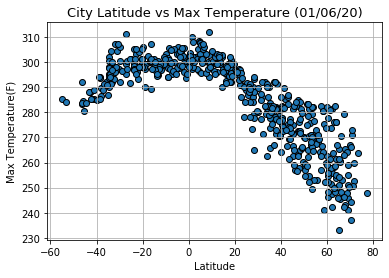

<Figure size 432x288 with 0 Axes>

In [56]:
#Create scattor plot, add labels, grids, save image
plt.scatter(cities_df["Latitude"],cities_df["Max Temperature(F)"],marker ="o",edgecolors="black")
plt.title("City Latitude vs Max Temperature (01/06/20)",fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()
plt.show()

plt.savefig("output_data/max_temp_latitude.png")

#### Latitude vs. Humidity Plot

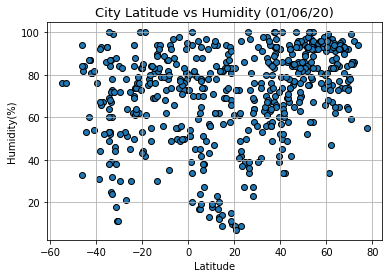

<Figure size 432x288 with 0 Axes>

In [55]:
#Create scattor plot, add labels, grids, save image
plt.scatter(cities_df["Latitude"],cities_df["Humidity"],marker ="o",edgecolors="black")
plt.title("City Latitude vs Humidity (01/06/20)",fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.show()

plt.savefig("output_data/humidity_latitude.png")

#### Latitude vs. Cloudiness Plot

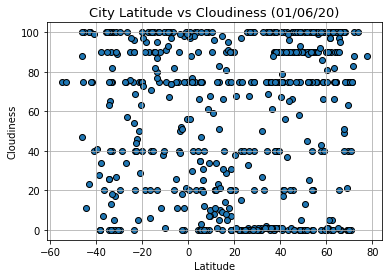

<Figure size 432x288 with 0 Axes>

In [58]:
#Create scattor plot, add labels, grids, save image
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"],marker ="o", edgecolors="black")
plt.title("City Latitude vs Cloudiness (01/06/20)",fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()

plt.savefig("output_data/cloudiness_latitude.png")

#### Latitude vs. Wind Speed Plot

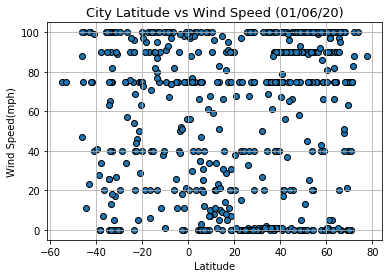

<Figure size 432x288 with 0 Axes>

In [57]:
#Create scattor plot, add labels, grids, save image
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed(mph)"],marker ="o", edgecolors="black")
plt.title("City Latitude vs Wind Speed (01/06/20)",fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()
plt.show()

plt.savefig("output_data/wind_latitude.png")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


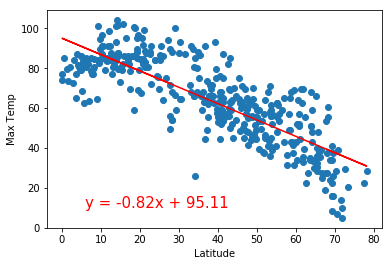

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


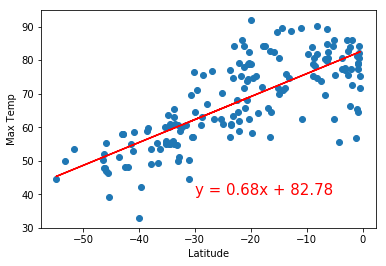

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


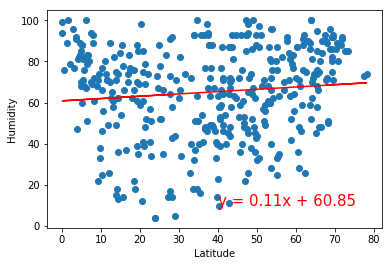

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


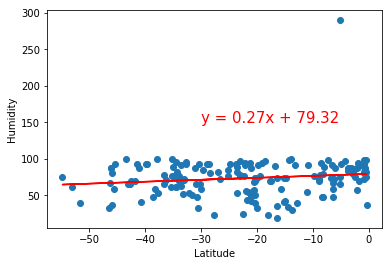

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


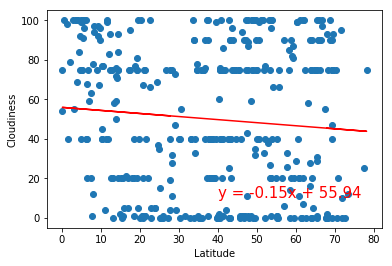

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


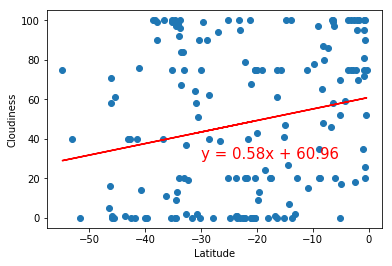

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


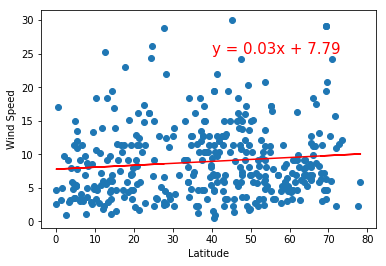

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


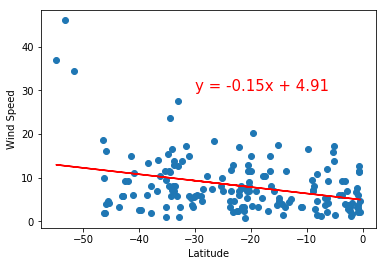